<a href="https://colab.research.google.com/github/kristapsjanis/bachelor-s/blob/main/isolation_forest_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

from sklearn.ensemble import IsolationForest
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('MaunaLoaDailyTemps.csv')

In [ ]:
df

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758
...,...,...,...,...,...,...
1820,12/26/2018,35.0,45.0,40.0,654,1752
1821,12/27/2018,33.0,44.0,39.0,655,1752
1822,12/28/2018,33.0,47.0,40.0,655,1753
1823,12/29/2018,36.0,47.0,42.0,655,1753


In [ ]:
df['AvgTemp'] = df['AvgTemp'].replace([np.inf, -np.inf], np.nan)
df['AvgTemp'] = df['AvgTemp'].fillna(0)
df['AvgTemp'] = df['AvgTemp'].astype(int)
print(df)

            DATE  MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
0       1/1/2014     33.0     46.0       40      657    1756
1       1/2/2014     35.0     50.0       43      657    1756
2       1/3/2014     36.0     45.0       41      657    1757
3       1/4/2014     32.0     41.0       37      658    1757
4       1/5/2014     24.0     38.0       31      658    1758
...          ...      ...      ...      ...      ...     ...
1820  12/26/2018     35.0     45.0       40      654    1752
1821  12/27/2018     33.0     44.0       39      655    1752
1822  12/28/2018     33.0     47.0       40      655    1753
1823  12/29/2018     36.0     47.0       42      655    1753
1824  12/30/2018     39.0     52.0       46      656    1754

[1825 rows x 6 columns]


In [ ]:
df['DATE']=pd.to_datetime(df['DATE'])

In [ ]:
df.loc[:, ['DATE', 'AvgTemp']]

,DATE,AvgTemp
0,2014-01-01,40
1,2014-01-02,43
2,2014-01-03,41
3,2014-01-04,37
4,2014-01-05,31
...,...,...
1820,2018-12-26,40
1821,2018-12-27,39
1822,2018-12-28,40
1823,2018-12-29,42


In [ ]:
df = df.set_index('DATE')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1821 non-null   float64
 1   MaxTemp  1821 non-null   float64
 2   AvgTemp  1825 non-null   int64  
 3   Sunrise  1825 non-null   int64  
 4   Sunset   1825 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 85.5 KB


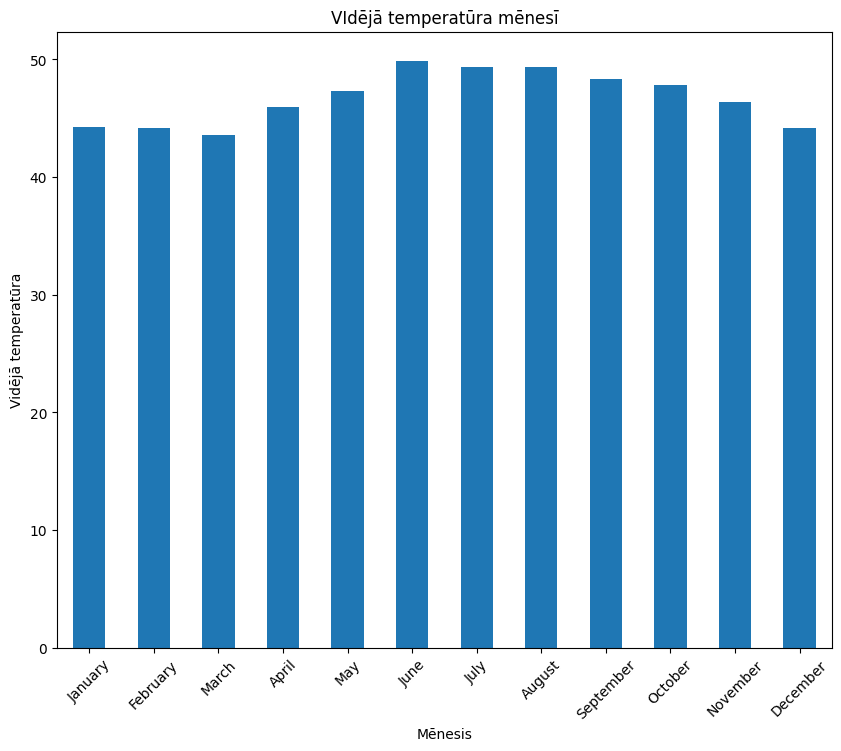

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('MaunaLoaDailyTemps.csv')

df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

df['AvgTemp'] = df['AvgTemp'].replace([np.inf, -np.inf], np.nan)
df['AvgTemp'] = df['AvgTemp'].fillna(0)

df['AvgTemp'] = df['AvgTemp'].astype(int)

df['hour'] = df['DATE'].dt.hour

df['month'] = pd.Categorical(df['DATE'].dt.strftime('%B'), categories=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

monthly_avg_temp = df.groupby('month')['AvgTemp'].mean()

monthly_avg_temp.plot(kind='bar')
plt.xlabel('Mēnesis')
plt.ylabel('Vidējā temperatūra')
plt.title('VIdējā temperatūra mēnesī')
plt.xticks(rotation=45)
plt.show()



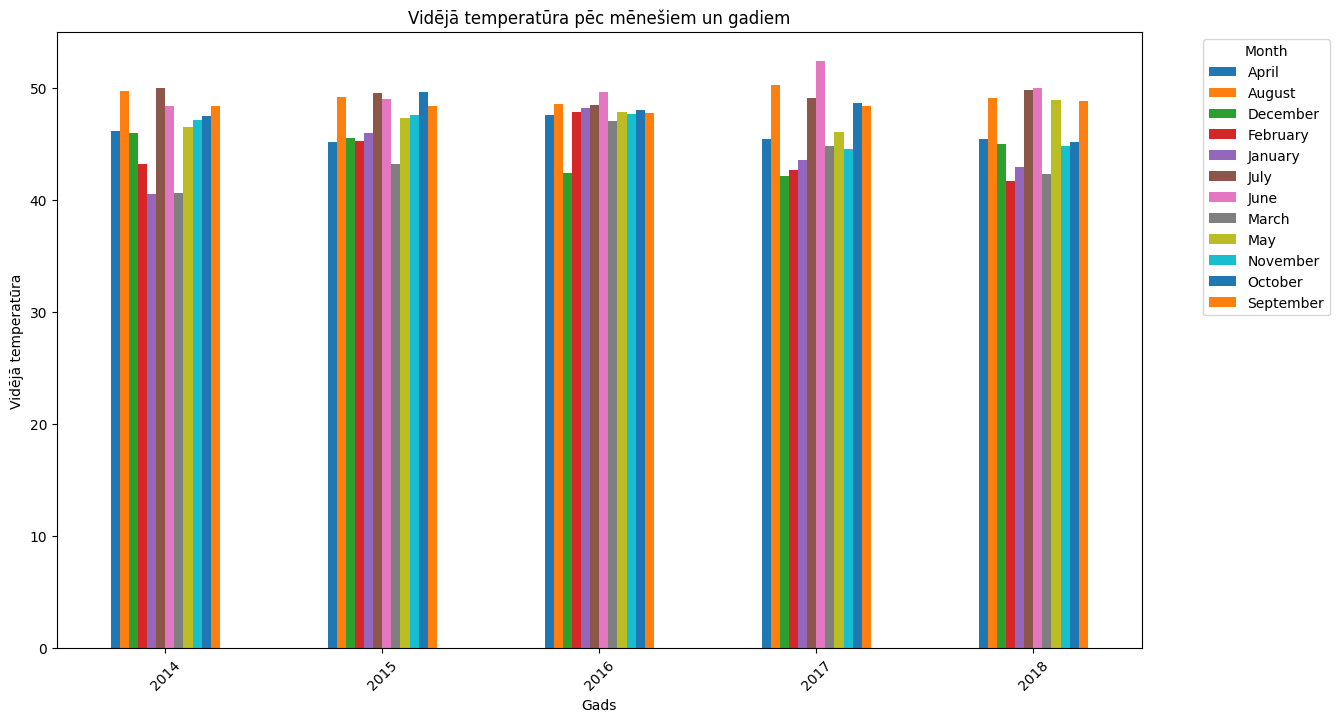

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('MaunaLoaDailyTemps.csv')

df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

df['AvgTemp'] = df['AvgTemp'].replace([np.inf, -np.inf], np.nan)
df['AvgTemp'] = df['AvgTemp'].fillna(0)

df['AvgTemp'] = df['AvgTemp'].astype(int)

df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.strftime('%B')

monthly_avg_temp = df.groupby(['year', 'month'])['AvgTemp'].mean().unstack()

monthly_avg_temp.plot(kind='bar', figsize=(14, 8))
plt.xlabel('Gads')
plt.ylabel('Vidējā temperatūra')
plt.title('Vidējā temperatūra pēc mēnešiem un gadiem')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


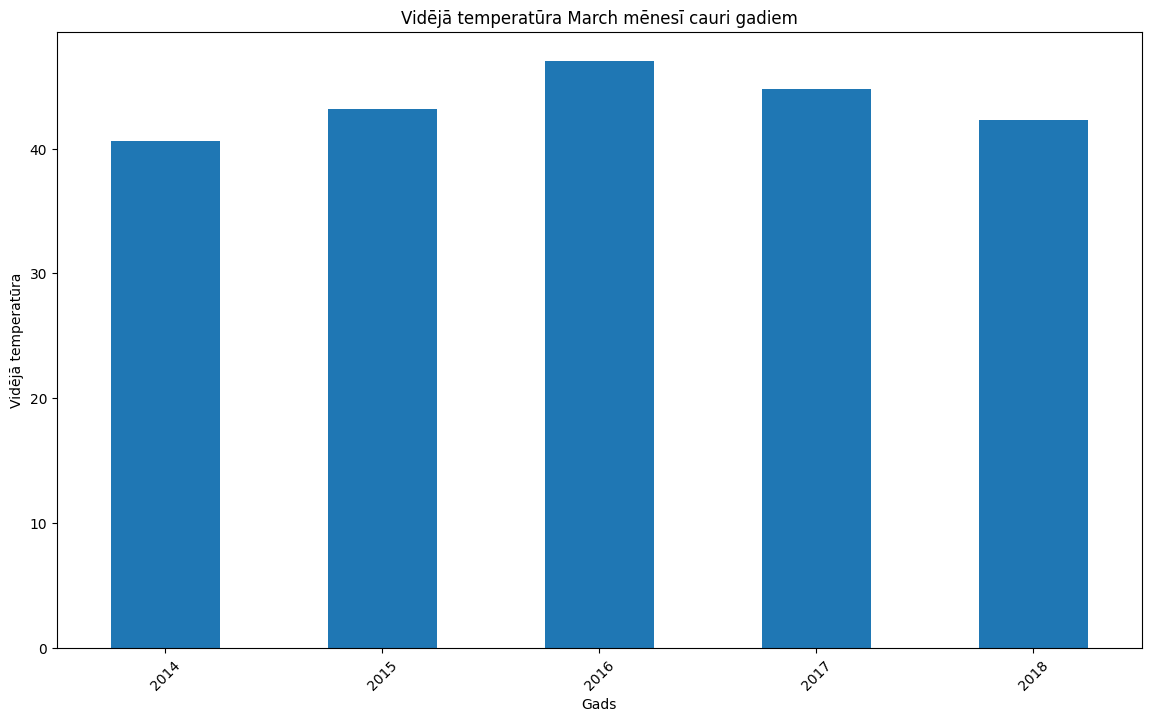

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('MaunaLoaDailyTemps.csv')

df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

df['AvgTemp'] = df['AvgTemp'].replace([np.inf, -np.inf], np.nan)
df['AvgTemp'] = df['AvgTemp'].fillna(0)

df['AvgTemp'] = df['AvgTemp'].astype(int)

df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.strftime('%B')

month_to_plot = 'March'
df_month = df[df['month'] == month_to_plot]

monthly_avg_temp = df_month.groupby('year')['AvgTemp'].mean()

monthly_avg_temp.plot(kind='bar', figsize=(14, 8))
plt.xlabel('Gads')
plt.ylabel('Vidējā temperatūra')
plt.title(f'Vidējā temperatūra {month_to_plot} mēnesī cauri gadiem')
plt.xticks(rotation=45)
plt.show()


In [ ]:
fig = px.line(df.reset_index(), x='DATE', y='AvgTemp', title='Vidējās temperatūras fiksējumu izmaiņa')

fig.update_xaxes(
    rangeslider_visible=True,
)

fig.show()

In [ ]:
model=IsolationForest(contamination=0.02)
model.fit(df[['AvgTemp']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.02)

In [ ]:
df['anomālijas']=pd.Series(model.predict(df[['AvgTemp']])).apply(lambda x: 'yes' if (x ==-1)else 'no')

In [ ]:
df.query('anomālijas=="yes"')

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,year,month,anomālijas
4,2014-01-05,24.0,38.0,31,658,1758,2014,January,yes
5,2014-01-06,22.0,39.0,31,658,1759,2014,January,yes
27,2014-01-28,29.0,39.0,34,658,1813,2014,January,yes
28,2014-01-29,30.0,36.0,33,658,1813,2014,January,yes
29,2014-01-30,28.0,39.0,34,658,1814,2014,January,yes
136,2014-05-17,NaN,NaN,0,546,1851,2014,May,yes
183,2014-07-03,48.0,66.0,57,548,1905,2014,July,yes
367,2015-01-03,29.0,36.0,33,657,1757,2015,January,yes
432,2015-03-09,33.0,37.0,35,636,1830,2015,March,yes
434,2015-03-11,31.0,37.0,34,634,1831,2015,March,yes


In [ ]:
df

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,year,month,anomālijas
0,2014-01-01,33.0,46.0,40,657,1756,2014,January,no
1,2014-01-02,35.0,50.0,43,657,1756,2014,January,no
2,2014-01-03,36.0,45.0,41,657,1757,2014,January,no
3,2014-01-04,32.0,41.0,37,658,1757,2014,January,no
4,2014-01-05,24.0,38.0,31,658,1758,2014,January,yes
...,...,...,...,...,...,...,...,...,...
1820,2018-12-26,35.0,45.0,40,654,1752,2018,December,no
1821,2018-12-27,33.0,44.0,39,655,1752,2018,December,no
1822,2018-12-28,33.0,47.0,40,655,1753,2018,December,no
1823,2018-12-29,36.0,47.0,42,655,1753,2018,December,no


In [ ]:
fig = px.scatter(df.reset_index(), x='DATE', y='AvgTemp', color='anomālijas', hover_data=['month'], title='Vidējās Temeratūras izmaiņa')

fig.update_xaxes(
    rangeslider_visible=True,
)

fig.show()

In [ ]:
df['prediction'] = model.predict(df[['AvgTemp']])

# anomāliju definēšana
df['anomālijas'] = pd.Series(model.predict(df[['AvgTemp']])).apply(lambda x: 'yes' if x == -1 else 'no')

# Anomāliju un normālo vērtību skaits
anomaly_counts = df['anomālijas'].value_counts()
num_anomalies = anomaly_counts.get('yes', 0)
#num_non_anomalies = anomaly_counts.get('no', 0)

print(f"Number of anomalies: {num_anomalies}")
#print(f"Number of non-anomalies: {num_non_anomalies}")

# Anomāliju rindas
anomalies_df = df.query('anomālijas == "yes"')
print(anomalies_df)


Number of anomalies: 22
           DATE  MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset  year     month  \
4    2014-01-05     24.0     38.0       31      658    1758  2014   January   
5    2014-01-06     22.0     39.0       31      658    1759  2014   January   
27   2014-01-28     29.0     39.0       34      658    1813  2014   January   
28   2014-01-29     30.0     36.0       33      658    1813  2014   January   
29   2014-01-30     28.0     39.0       34      658    1814  2014   January   
136  2014-05-17      NaN      NaN        0      546    1851  2014       May   
183  2014-07-03     48.0     66.0       57      548    1905  2014      July   
367  2015-01-03     29.0     36.0       33      657    1757  2015   January   
432  2015-03-09     33.0     37.0       35      636    1830  2015     March   
434  2015-03-11     31.0     37.0       34      634    1831  2015     March   
758  2016-01-29     49.0     64.0       57      658    1813  2016   January   
840  2016-04-20      NaN    

In [ ]:
model = IsolationForest()
model.fit(df[['AvgTemp']])

IsolationForest()

In [ ]:
score=model.decision_function(df[['AvgTemp']])

In [ ]:
score

array([-0.01822825,  0.01025292, -0.01538699, ..., -0.01822825,
        0.0021877 ,  0.06846394])

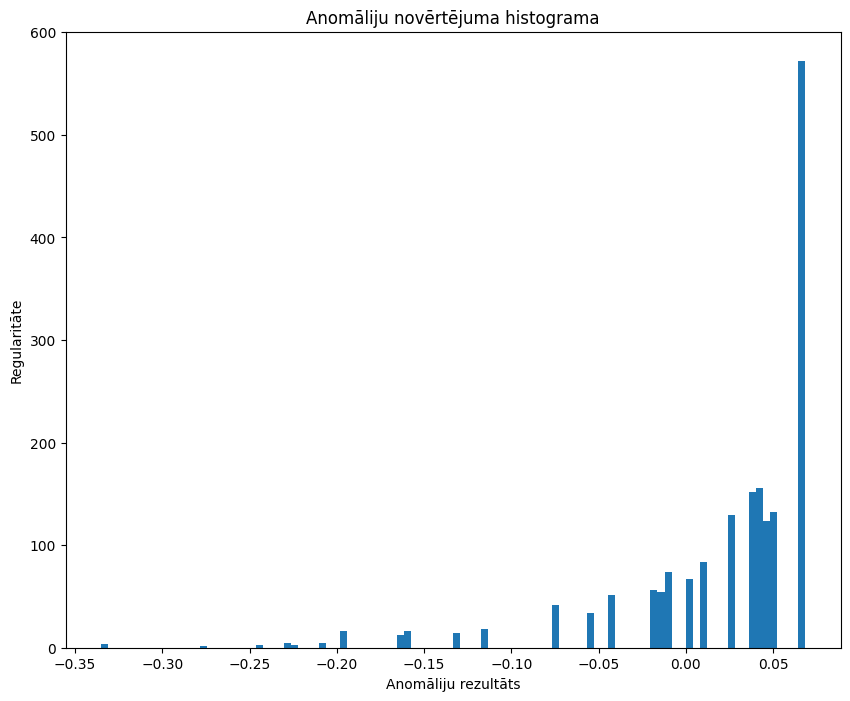

In [ ]:
plt.hist(score, bins=100)
plt.xlabel('Anomāliju rezultāts')
plt.ylabel('Regularitāte')
plt.title( 'Anomāliju novērtējuma histograma')
plt.show()

In [ ]:
df['scores'] = score

In [ ]:
df

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,year,month,anomālijas,prediction,scores
0,2014-01-01,33.0,46.0,40,657,1756,2014,January,no,1,-0.018228
1,2014-01-02,35.0,50.0,43,657,1756,2014,January,no,1,0.010253
2,2014-01-03,36.0,45.0,41,657,1757,2014,January,no,1,-0.015387
3,2014-01-04,32.0,41.0,37,658,1757,2014,January,no,1,-0.133256
4,2014-01-05,24.0,38.0,31,658,1758,2014,January,yes,-1,-0.276216
...,...,...,...,...,...,...,...,...,...,...,...
1820,2018-12-26,35.0,45.0,40,654,1752,2018,December,no,1,-0.018228
1821,2018-12-27,33.0,44.0,39,655,1752,2018,December,no,1,-0.056200
1822,2018-12-28,33.0,47.0,40,655,1753,2018,December,no,1,-0.018228
1823,2018-12-29,36.0,47.0,42,655,1753,2018,December,no,1,0.002188


In [ ]:
df.query('scores<-0.20')

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,year,month,anomālijas,prediction,scores
4,2014-01-05,24.0,38.0,31,658,1758,2014,January,yes,-1,-0.276216
5,2014-01-06,22.0,39.0,31,658,1759,2014,January,yes,-1,-0.276216
27,2014-01-28,29.0,39.0,34,658,1813,2014,January,yes,-1,-0.228657
28,2014-01-29,30.0,36.0,33,658,1813,2014,January,yes,-1,-0.242507
29,2014-01-30,28.0,39.0,34,658,1814,2014,January,yes,-1,-0.228657
136,2014-05-17,NaN,NaN,0,546,1851,2014,May,yes,-1,-0.335176
183,2014-07-03,48.0,66.0,57,548,1905,2014,July,yes,-1,-0.225257
367,2015-01-03,29.0,36.0,33,657,1757,2015,January,yes,-1,-0.242507
432,2015-03-09,33.0,37.0,35,636,1830,2015,March,yes,-1,-0.207089
434,2015-03-11,31.0,37.0,34,634,1831,2015,March,yes,-1,-0.228657
